# Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data
# Overview
    In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import inspect

# Dataset: "Alphabets_data.csv"
    The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.


In [2]:
df = pd.read_csv(r"F:\Drive\ExcelR\Assignments\Neural networks\Neural networks\Alphabets_data.csv")
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


# Tasks

## 1. Data Exploration and Preprocessing
    - Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
    - Execute necessary data preprocessing steps including data normalization, managing missing values.

In [3]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [4]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [5]:
X = df.drop('letter', axis=1)  
y = df['letter']

In [6]:
X

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
y

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Data Visualizations

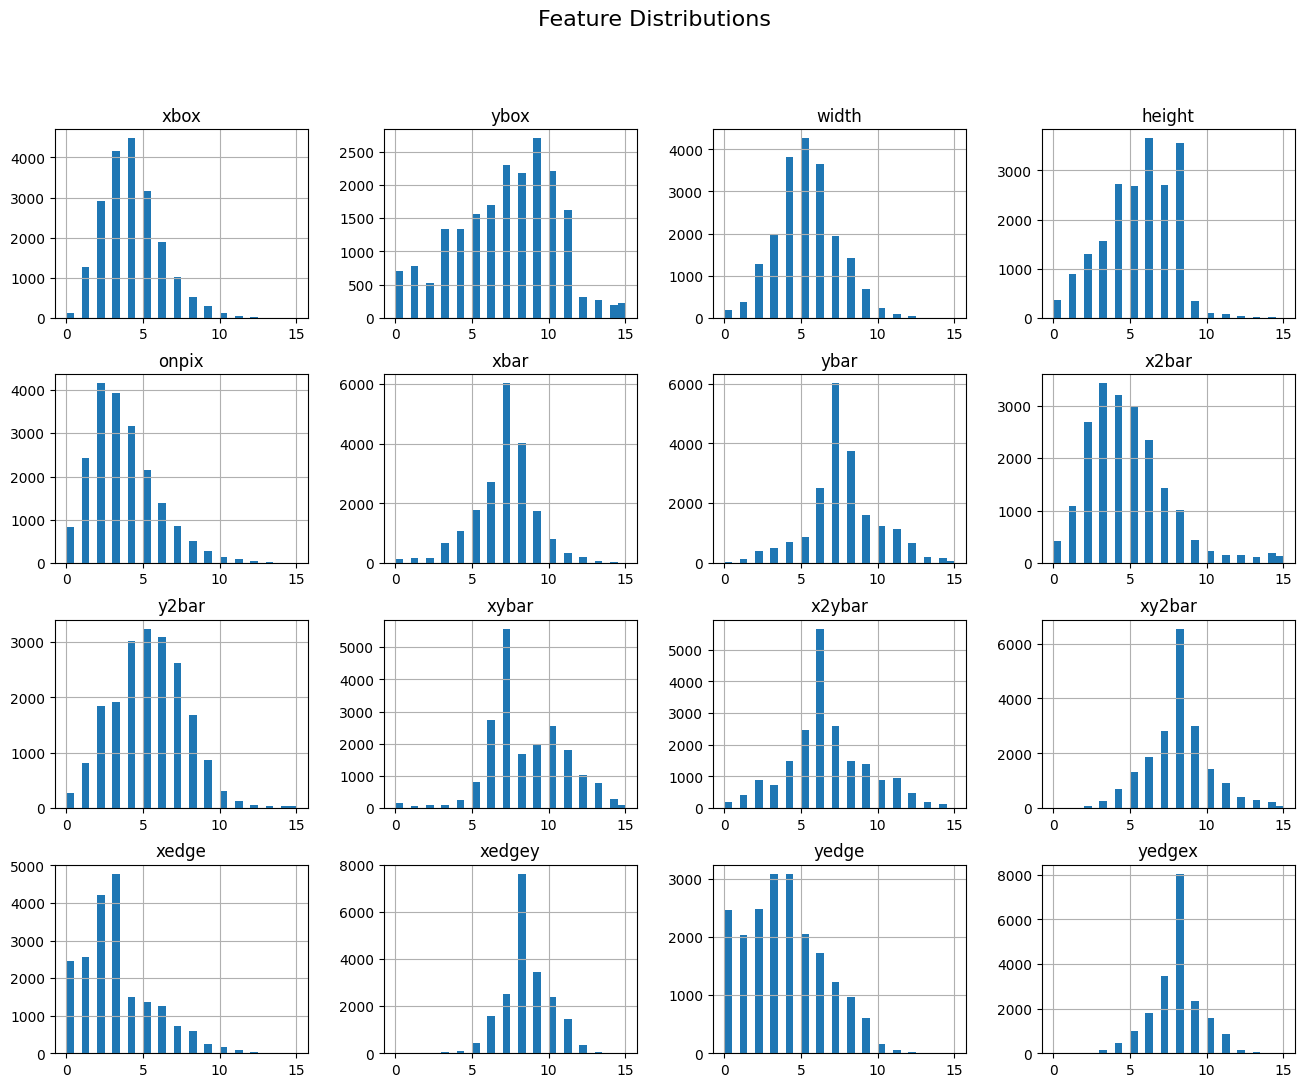

In [10]:
# Visualize using histograms 
df.drop('letter', axis=1).hist(figsize=(16, 12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

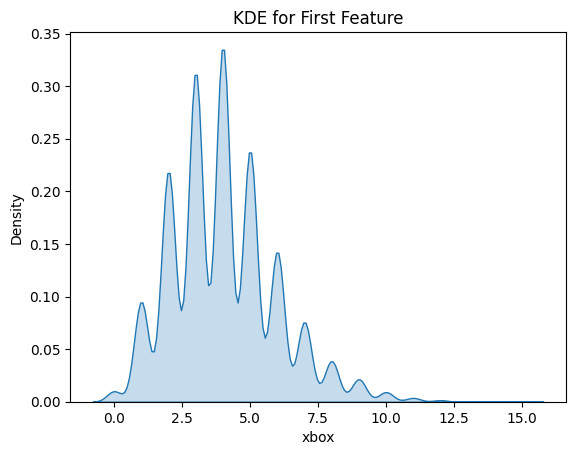

In [12]:
# KDE plot 
sns.kdeplot(df.iloc[:, 1], fill=True)
plt.title("KDE for First Feature")
plt.show()

## 2. Model Implementation
- Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
- Divide the dataset into training and test sets.
- Train your model on the training set and then use it to make predictions on the test set.

In [27]:
def create_model(neurons=32):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X_scaled.shape[1],)),
        tf.keras.layers.Dense(neurons, activation='relu'),
        tf.keras.layers.Dense(neurons // 2, activation='relu'),
        tf.keras.layers.Dense(len(y.unique()), activation='softmax')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),  # Default learning rate will be used
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model



In [28]:
model = create_model()

In [29]:
label_encoder = LabelEncoder()

In [30]:
y_encoded = label_encoder.fit_transform(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1018 - loss: 3.1226 - val_accuracy: 0.3453 - val_loss: 2.1899
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4353 - loss: 1.9386 - val_accuracy: 0.5400 - val_loss: 1.5510
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5642 - loss: 1.4997 - val_accuracy: 0.5890 - val_loss: 1.3929
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6085 - loss: 1.3739 - val_accuracy: 0.6150 - val_loss: 1.3006
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6245 - loss: 1.2994 - val_accuracy: 0.6507 - val_loss: 1.2149
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6555 - loss: 1.2109 - val_accuracy: 0.6905 - val_loss: 1.1122
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6794 - loss: 1.1103 - val_accuracy: 0.6927 - val_loss: 1.0735
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7010 - loss: 1.0446 - val_accuracy: 0.

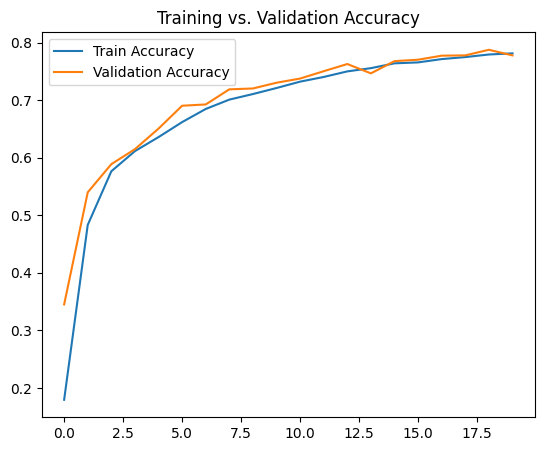

In [24]:
# Plot accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.show()

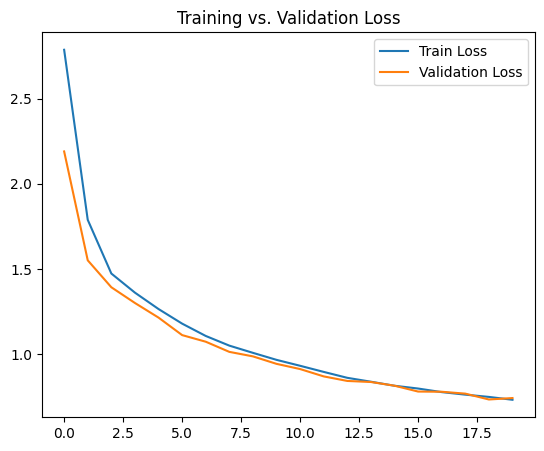

In [25]:
# Plot loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print()
print(f'Test Accuracy: {test_acc}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.7794 - loss: 0.7338

Test Accuracy: 0.777999997138977


## 3. Hyperparameter Tuning
- Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
- Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [32]:
model1 = KerasClassifier(model=create_model,  # Pass the function that creates and returns the model
                         batch_size=16,
                         epochs=20)

In [33]:
print("KerasClassifier parameters:", model1.get_params().keys())
print()
print("Create_model parameters:", inspect.signature(create_model).parameters)

KerasClassifier parameters: dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

Create_model parameters: OrderedDict({'neurons': <Parameter "neurons=32">})


In [34]:
param_grid = {
    'model__neurons': [32, 64],
    'batch_size': [16, 32],
    'epochs': [10, 20],
    'optimizer': ['rmsprop', 'adam']
}

In [35]:
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3, verbose=1)


In [36]:
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1298 - loss: 3.0761
Epoch 2/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5418 - loss: 1.6688
Epoch 3/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6473 - loss: 1.2664
Epoch 4/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6848 - loss: 1.1404
Epoch 5/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7157 - loss: 1.0177
Epoch 6/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7235 - loss: 0.9926
Epoch 7/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7494 - loss: 0.9291
Epoch 8/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7511 - loss: 0.9056
Epoch 9/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7617 - loss: 0.8600
Epoch 10/10
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7740 - loss: 0.8249
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
Epoch 1/10
667/667 ━━━━━━━━━━━━━━━━

In [37]:
best_model = grid_result.best_estimator_

In [38]:
print(f'Best Model Params: {best_model.get_params()}')

Best Model Params: {'model': <function create_model at 0x000001F1CD9999E0>, 'build_fn': None, 'warm_start': False, 'random_state': None, 'optimizer': 'rmsprop', 'loss': None, 'metrics': None, 'batch_size': 16, 'validation_batch_size': None, 'verbose': 1, 'callbacks': None, 'validation_split': 0.0, 'shuffle': True, 'run_eagerly': False, 'epochs': 20, 'class_weight': None, 'model__neurons': 64}


In [39]:
keras_model = best_model.model_

In [40]:
test_loss, test_acc = keras_model.evaluate(X_test, y_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.8732 - loss: 0.3939


In [41]:
print(f'Tuned Test Accuracy: {test_acc}')

Tuned Test Accuracy: 0.8759999871253967


## 4. Evaluation
- Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
- Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [42]:
y_pred_default_prob = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
if y_pred_default_prob.ndim > 1:
    y_pred_default = np.argmax(y_pred_default_prob, axis=1)
else:
    y_pred_default = y_pred_default_prob

In [44]:
y_pred_tuned_prob = best_model.predict(X_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


In [45]:
if y_pred_tuned_prob.ndim > 1:
    y_pred_tuned = np.argmax(y_pred_tuned_prob, axis=1)
else:
    y_pred_tuned = y_pred_tuned_prob

In [46]:
# Evaluate metrics
print(f'Accuracy (Default): {accuracy_score(y_test, y_pred_default)}')
print(f'Precision (Default): {precision_score(y_test, y_pred_default, average="weighted")}')
print(f'Recall (Default): {recall_score(y_test, y_pred_default, average="weighted")}')
print(f'F1-Score (Default): {f1_score(y_test, y_pred_default, average="weighted")}')

Accuracy (Default): 0.0345
Precision (Default): 0.007143954829623574
Recall (Default): 0.0345
F1-Score (Default): 0.008856530396805475


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
print(f'Accuracy (Tuned): {accuracy_score(y_test, y_pred_tuned)}')
print(f'Precision (Tuned): {precision_score(y_test, y_pred_tuned, average="weighted")}')
print(f'Recall (Tuned): {recall_score(y_test, y_pred_tuned, average="weighted")}')
print(f'F1-Score (Tuned): {f1_score(y_test, y_pred_tuned, average="weighted")}')

Accuracy (Tuned): 0.876
Precision (Tuned): 0.8859314324725347
Recall (Tuned): 0.876
F1-Score (Tuned): 0.876781808699823
